In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_raw1= pd.read_csv("IoTPond7.csv", delimiter = ",",low_memory=False)

In [3]:
df_raw1.head(5)

,created_at,Date,entry_id,temperature(C),turbidity (NTU),Dissolved Oxygen (g/ml),PH,ammonia(g/ml),nitrate(g/ml),Fish_length(cm),Fish_weight(g),Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2021-06-18 13:02:10 CET,18-06-21,1,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143,NaN,NaN,NaN
1,2021-06-18 13:02:30 CET,18-06-21,2,25.3750,41,40.048,8.13858,0.14989,1968,6.772857,3.037143,NaN,NaN,NaN
2,2021-06-18 13:02:50 CET,18-06-21,3,25.3125,41,40.048,8.34740,0.24039,1879,6.772857,3.037143,NaN,NaN,NaN
3,2021-06-18 13:03:10 CET,18-06-21,4,25.3125,41,40.048,8.17490,0.31723,1792,6.772857,3.037143,NaN,NaN,NaN
4,2021-06-18 13:03:40 CET,18-06-21,5,25.3750,31,40.048,8.14766,1.02537,1934,6.772857,3.037143,NaN,NaN,NaN


In [4]:
df_raw1.tail(5)

,created_at,Date,entry_id,temperature(C),turbidity (NTU),Dissolved Oxygen (g/ml),PH,ammonia(g/ml),nitrate(g/ml),Fish_length(cm),Fish_weight(g),Unnamed: 11,Unnamed: 12,Unnamed: 13
279607,2021-12-23T17:10:27+01:00,23-12-21,282022,25.0000,16,4.381,5.63280,NaN,1463,69.375714,1017.557143,NaN,NaN,NaN
279608,2021-12-23T18:32:16+01:00,23-12-21,282023,24.8750,15,4.006,5.67365,NaN,1526,69.375714,1017.557143,NaN,NaN,NaN
279609,2021-12-26T00:05:29+01:00,26-12-21,282024,24.6250,16,3.888,5.36951,NaN,1615,69.637143,1021.371429,NaN,NaN,NaN
279610,2021-12-26T00:05:48+01:00,26-12-21,282025,24.5625,17,4.285,5.45576,NaN,1605,69.637143,1021.371429,NaN,NaN,NaN
279611,2021-12-30T20:37:56+01:00,30-12-21,282026,24.1875,19,3.955,3.62635,NaN,1858,69.985714,1026.457143,NaN,NaN,NaN


In [5]:
df_raw1.drop("Date",axis=1,inplace=True)

In [6]:
df_raw1.drop("Unnamed: 11",axis=1,inplace=True)
df_raw1.drop("Unnamed: 12",axis=1,inplace=True)
df_raw1.drop("Unnamed: 13",axis=1,inplace=True)

In [7]:
df_raw1.drop("entry_id",axis=1,inplace=True)

In [8]:
df_raw1.head(5)

,created_at,temperature(C),turbidity (NTU),Dissolved Oxygen (g/ml),PH,ammonia(g/ml),nitrate(g/ml),Fish_length(cm),Fish_weight(g)
0,2021-06-18 13:02:10 CET,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143
1,2021-06-18 13:02:30 CET,25.3750,41,40.048,8.13858,0.14989,1968,6.772857,3.037143
2,2021-06-18 13:02:50 CET,25.3125,41,40.048,8.34740,0.24039,1879,6.772857,3.037143
3,2021-06-18 13:03:10 CET,25.3125,41,40.048,8.17490,0.31723,1792,6.772857,3.037143
4,2021-06-18 13:03:40 CET,25.3750,31,40.048,8.14766,1.02537,1934,6.772857,3.037143


In [9]:
df_raw1.columns=['created_at', 'Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Fish_Length', 'Fish_Weight']

No data for the population in this pond .

In [10]:
df_raw1.dtypes

created_at           object
Temperature         float64
Turbidity             int64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate               int64
Fish_Length         float64
Fish_Weight         float64
dtype: object

Lets fix the date formats first 

In [11]:
df_raw1.iloc[0:159525,0]=df_raw1.iloc[0:159525,0].apply(lambda x : x[:-3])

In [12]:
df_raw1.iloc[159525:279612,0]=df_raw1.iloc[159525:279612,0].apply(lambda x : x[:-6].replace("T"," "))

In [13]:
df_raw1.tail(5)

,created_at,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight
279607,2021-12-23 17:10:27,25.0000,16,4.381,5.63280,NaN,1463,69.375714,1017.557143
279608,2021-12-23 18:32:16,24.8750,15,4.006,5.67365,NaN,1526,69.375714,1017.557143
279609,2021-12-26 00:05:29,24.6250,16,3.888,5.36951,NaN,1615,69.637143,1021.371429
279610,2021-12-26 00:05:48,24.5625,17,4.285,5.45576,NaN,1605,69.637143,1021.371429
279611,2021-12-30 20:37:56,24.1875,19,3.955,3.62635,NaN,1858,69.985714,1026.457143


In [14]:
df_raw1.head(5)

,created_at,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight
0,2021-06-18 13:02:10,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143
1,2021-06-18 13:02:30,25.3750,41,40.048,8.13858,0.14989,1968,6.772857,3.037143
2,2021-06-18 13:02:50,25.3125,41,40.048,8.34740,0.24039,1879,6.772857,3.037143
3,2021-06-18 13:03:10,25.3125,41,40.048,8.17490,0.31723,1792,6.772857,3.037143
4,2021-06-18 13:03:40,25.3750,31,40.048,8.14766,1.02537,1934,6.772857,3.037143


In [15]:
df_raw1.iloc[159525]

created_at          2021-08-27 11:54:10
Temperature                      26.375
Turbidity                            34
Dissolved Oxygen                  6.097
PH                              7.03549
Ammonia                         1.13799
Nitrate                              35
Fish_Length                   28.015714
Fish_Weight                  200.428571
Name: 159525, dtype: object

<AxesSubplot:>

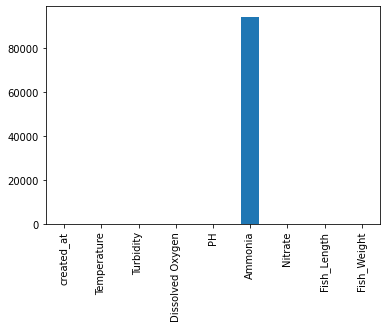

In [16]:
df_raw1.isna().sum().plot.bar()

In [17]:
df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)

In [18]:
df_raw1.drop(columns='created_at', axis=1,inplace=True)

In [19]:
df_raw1['Date'] = df_raw1['Datetime'].dt.date
df_raw1['Time'] = df_raw1['Datetime'].dt.time

In [20]:
df_raw1.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time
0,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143,2021-06-18 13:02:10,2021-06-18,13:02:10
1,25.3750,41,40.048,8.13858,0.14989,1968,6.772857,3.037143,2021-06-18 13:02:30,2021-06-18,13:02:30
2,25.3125,41,40.048,8.34740,0.24039,1879,6.772857,3.037143,2021-06-18 13:02:50,2021-06-18,13:02:50
3,25.3125,41,40.048,8.17490,0.31723,1792,6.772857,3.037143,2021-06-18 13:03:10,2021-06-18,13:03:10
4,25.3750,31,40.048,8.14766,1.02537,1934,6.772857,3.037143,2021-06-18 13:03:40,2021-06-18,13:03:40


Sort DataFrame by Date (Datetime)

In [21]:
df=df_raw1.sort_values(by='Datetime') 

In [22]:
# df_raw1 = df_raw1.dropna()
#clean up missing data here
# df.ffill(axis=0,inplace=True)

In [23]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

/home/rupamay/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime
count,279612.0000,279612.0000,279612.0000,279612.0000,185224.0000,279612.0000,279612.0000,279612.0000,279612
mean,25.5445,31.1968,14.7231,5.1000,inf,1076.9666,30.6065,279.8542,2021-09-01 18:25:35.338715904
min,-127.0000,-10.0000,0.0000,-3.1374,0.0001,0.0000,6.7729,3.0371,2021-06-18 13:02:10
25%,24.8125,29.0000,5.0150,4.2937,2.0854,367.0000,16.5000,41.0000,2021-07-17 20:23:35.500000
50%,25.3750,33.0000,10.6920,6.8766,nan,848.0000,21.6957,114.1286,2021-08-11 07:38:06
75%,26.1250,34.0000,21.4090,7.0990,nan,1837.0000,40.3214,368.0571,2021-09-30 18:10:40
max,30.2500,100.0000,44.6350,15.4517,inf,3470.0000,69.9857,1026.4571,2021-12-30 20:37:56
std,1.4381,8.9179,12.2552,3.1325,nan,709.7141,19.6874,324.1265,NaN


We have 279612 records in total. There are 94388 records where Ammonia reading is missing and we see some noisy data. Start date- 18th of June,'21 and end date- 30th of Dec,'21

In [24]:
# Replacing infinite with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
df.dropna(inplace=True)

In [25]:
rec_where_ammonia_are_na=df[df["Ammonia"].isna() ]

In [26]:
rec_where_ammonia_are_na

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time


In [27]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime
count,90267.0000,90267.0000,90267.0000,90267.0000,90267.0000,90267.0000,90267.0000,90267.0000,90267
mean,25.2827,34.2557,17.1942,5.6011,303893264.5852,889.1091,23.0715,137.3887,2021-08-15 23:26:33.387184640
min,23.4375,6.0000,0.0000,-3.1374,0.0001,20.0000,6.7729,3.0371,2021-06-18 13:02:10
25%,24.6875,33.0000,6.9390,6.9538,0.7692,391.0000,16.8400,44.2000,2021-07-31 22:28:19
50%,25.2500,34.0000,14.3600,7.0355,1.9288,727.0000,21.6957,114.1286,2021-08-11 08:52:47
75%,25.8125,35.0000,22.5310,7.1671,24.8076,1287.0000,28.7800,214.5714,2021-08-30 02:07:14
max,28.1875,52.0000,42.2610,8.3474,427000000000.0000,3393.0000,34.3000,308.7714,2021-09-20 04:36:10
std,0.7870,3.5694,12.0924,3.2189,9949745586.9287,565.9916,6.1277,91.5513,NaN


In [28]:
d=df["Date"].unique()
print(len(d))
d

71


array([datetime.date(2021, 6, 18), datetime.date(2021, 6, 19),
       datetime.date(2021, 6, 20), datetime.date(2021, 6, 21),
       datetime.date(2021, 6, 22), datetime.date(2021, 6, 28),
       datetime.date(2021, 6, 29), datetime.date(2021, 7, 1),
       datetime.date(2021, 7, 2), datetime.date(2021, 7, 3),
       datetime.date(2021, 7, 7), datetime.date(2021, 7, 8),
       datetime.date(2021, 7, 9), datetime.date(2021, 7, 10),
       datetime.date(2021, 7, 12), datetime.date(2021, 7, 13),
       datetime.date(2021, 7, 14), datetime.date(2021, 7, 15),
       datetime.date(2021, 7, 16), datetime.date(2021, 7, 17),
       datetime.date(2021, 7, 19), datetime.date(2021, 7, 20),
       datetime.date(2021, 7, 21), datetime.date(2021, 7, 22),
       datetime.date(2021, 7, 23), datetime.date(2021, 7, 24),
       datetime.date(2021, 7, 25), datetime.date(2021, 7, 26),
       datetime.date(2021, 7, 27), datetime.date(2021, 7, 28),
       datetime.date(2021, 7, 29), datetime.date(2021, 7, 30)

In [29]:
a=df["Fish_Weight"].unique()
print(len(a))
a

70


array([  3.03714286,   3.14      ,   4.35857143,   5.57714286,
         6.79571429,  14.10714286,  15.32571429,  17.76285714,
        18.98142857,  20.2       ,  26.14285714,  27.62857143,
        29.11428571,  30.6       ,  33.57142857,  35.05714286,
        36.54285714,  38.02857143,  39.51428571,  41.        ,
        41.45714286,  41.68571429,  41.91428571,  42.14285714,
        42.37142857,  42.6       ,  42.82857143,  43.05714286,
        43.28571429,  43.51428571,  43.74285714,  43.97142857,
        44.2       ,  50.55714286,  56.91428571,  63.27142857,
        69.62857143,  75.98571429,  82.34285714,  88.7       ,
        95.05714286, 107.7714286 , 114.1285714 , 120.4857143 ,
       126.8428571 , 133.2       , 138.3714286 , 143.5428571 ,
       148.7142857 , 153.8857143 , 164.2285714 , 169.4       ,
       174.5714286 , 179.7428571 , 200.4285714 , 205.6       ,
       210.0857143 , 214.5714286 , 219.0571429 , 223.5428571 ,
       232.5142857 , 237.        , 241.4857143 , 245.97

In [30]:
date_group=df.groupby("Date", sort = False)
for i in range(len(date_group)):
    print(i,'---------> ',d[i],'-----------> ',date_group.get_group(d[i])["Fish_Weight"].unique())

0 --------->  2021-06-18 ----------->  [3.03714286]
1 --------->  2021-06-19 ----------->  [3.14]
2 --------->  2021-06-20 ----------->  [4.35857143]
3 --------->  2021-06-21 ----------->  [5.57714286]
4 --------->  2021-06-22 ----------->  [6.79571429]
5 --------->  2021-06-28 ----------->  [14.10714286]
6 --------->  2021-06-29 ----------->  [15.32571429]
7 --------->  2021-07-01 ----------->  [17.76285714]
8 --------->  2021-07-02 ----------->  [18.98142857]
9 --------->  2021-07-03 ----------->  [20.2]
10 --------->  2021-07-07 ----------->  [26.14285714]
11 --------->  2021-07-08 ----------->  [27.62857143]
12 --------->  2021-07-09 ----------->  [29.11428571]
13 --------->  2021-07-10 ----------->  [30.6]
14 --------->  2021-07-12 ----------->  [33.57142857]
15 --------->  2021-07-13 ----------->  [35.05714286]
16 --------->  2021-07-14 ----------->  [36.54285714]
17 --------->  2021-07-15 ----------->  [38.02857143]
18 --------->  2021-07-16 ----------->  [39.51428571]
19 ------

2021-08-09 ----------->  107.7714286

2021-08-10 ----------->  107.7714286

No weight change 

In [31]:
df.to_csv('Pond7.csv')

We do not have reading for an equal interval in a particular day . Also , we have missing dates where there was no reading taken between start date and end date.

In [32]:
df= pd.read_csv("Pond7.csv", delimiter = ",",low_memory=False )

In [33]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [34]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time
0,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143,2021-06-18 13:02:10,2021-06-18,13:02:10
1,25.3750,41,40.048,8.13858,0.14989,1968,6.772857,3.037143,2021-06-18 13:02:30,2021-06-18,13:02:30
2,25.3125,41,40.048,8.34740,0.24039,1879,6.772857,3.037143,2021-06-18 13:02:50,2021-06-18,13:02:50
3,25.3125,41,40.048,8.17490,0.31723,1792,6.772857,3.037143,2021-06-18 13:03:10,2021-06-18,13:03:10
4,25.3750,31,40.048,8.14766,1.02537,1934,6.772857,3.037143,2021-06-18 13:03:40,2021-06-18,13:03:40


In [35]:

df['Datetime'] = pd.to_datetime(df.Datetime,infer_datetime_format=True)
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time
df['Date_diff'] = df['Date'].diff()
# df['diff'] = df['diff'].fillna(0)



In [36]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143,2021-06-18 13:02:10,2021-06-18,13:02:10,NaT
1,25.3750,41,40.048,8.13858,0.14989,1968,6.772857,3.037143,2021-06-18 13:02:30,2021-06-18,13:02:30,0 days
2,25.3125,41,40.048,8.34740,0.24039,1879,6.772857,3.037143,2021-06-18 13:02:50,2021-06-18,13:02:50,0 days
3,25.3125,41,40.048,8.17490,0.31723,1792,6.772857,3.037143,2021-06-18 13:03:10,2021-06-18,13:03:10,0 days
4,25.3750,31,40.048,8.14766,1.02537,1934,6.772857,3.037143,2021-06-18 13:03:40,2021-06-18,13:03:40,0 days


In [37]:
df['Date_diff']=df['Date_diff'].astype('timedelta64[D]')

In [38]:
df['Date_diff'] = df['Date_diff'].fillna(0)

In [39]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143,2021-06-18 13:02:10,2021-06-18,13:02:10,0.0
1,25.3750,41,40.048,8.13858,0.14989,1968,6.772857,3.037143,2021-06-18 13:02:30,2021-06-18,13:02:30,0.0
2,25.3125,41,40.048,8.34740,0.24039,1879,6.772857,3.037143,2021-06-18 13:02:50,2021-06-18,13:02:50,0.0
3,25.3125,41,40.048,8.17490,0.31723,1792,6.772857,3.037143,2021-06-18 13:03:10,2021-06-18,13:03:10,0.0
4,25.3750,31,40.048,8.14766,1.02537,1934,6.772857,3.037143,2021-06-18 13:03:40,2021-06-18,13:03:40,0.0


In [40]:
df['Date_diff'].unique()

array([0., 1., 6., 2., 4., 9.])

In [41]:
p=df[df['Date_diff']>=2]
p       

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
196,25.4375,34,7.745,7.46220,4.270000e+11,483,10.864286,14.107143,2021-06-28 18:25:05,2021-06-28,18:25:05,6.0
212,25.4375,35,40.048,7.23977,3.608208e+09,452,12.205714,17.762857,2021-07-01 13:53:31,2021-07-01,13:53:31,2.0
1336,26.3125,34,3.221,6.97648,1.203230e+05,387,14.071429,26.142857,2021-07-07 16:23:14,2021-07-07,16:23:14,4.0
1532,24.8125,32,2.814,6.88569,3.557680e+05,387,15.285714,33.571429,2021-07-12 08:38:01,2021-07-12,08:38:01,2.0
1799,24.6250,31,1.470,6.87207,5.519301e+04,398,16.548571,41.457143,2021-07-19 09:41:18,2021-07-19,09:41:18,2.0
63022,25.8750,33,6.936,7.04911,1.520620e+00,863,25.325714,164.228571,2021-08-20 14:56:15,2021-08-20,14:56:15,2.0
64626,26.3750,34,6.097,7.03549,1.137990e+00,35,28.015714,200.428571,2021-08-27 11:54:10,2021-08-27,11:54:10,4.0
71316,25.6250,32,4.325,6.99917,1.948100e-01,1702,29.540000,232.514286,2021-09-03 14:43:25,2021-09-03,14:43:25,2.0
74335,26.1250,35,38.075,-1.33528,1.019640e+00,1543,32.500000,286.342857,2021-09-15 13:55:20,2021-09-15,13:55:20,9.0


In [42]:
df['Weight_diff'] = df['Fish_Weight'].diff()
df['Weight_diff'] = df['Weight_diff'].fillna(0)

In [43]:
df['Weight_diff'].unique()

array([ 0.        ,  0.10285714,  1.21857143,  1.21857143,  1.21857143,
        7.31142857,  1.21857143,  2.43714285,  1.21857143,  5.94285714,
        1.48571429,  1.48571428,  2.97142857,  1.48571429,  1.48571428,
        0.45714286,  0.22857143,  0.22857142,  0.22857143,  6.35714286,
        6.35714285,  6.35714286, 12.71428574,  6.3571428 ,  6.3571429 ,
        6.3571429 ,  5.1714286 ,  5.1714285 ,  5.1714286 , 10.3428571 ,
        5.1714285 , 20.6857143 ,  4.4857143 ,  4.4857143 ,  4.4857142 ,
        8.9714286 , 40.3714285 ,  4.4857143 ])

In [45]:
date_group=df.groupby("Date", sort = False)

In [46]:
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,
2021-06-18,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143,2021-06-18 13:02:10,13:02:10,0.0,0.000000
2021-06-19,25.5625,44,10.212,8.11134,451902.18750,858,6.840000,3.140000,2021-06-19 12:17:43,12:17:43,1.0,0.102857
2021-06-20,26.0625,47,25.556,8.12950,83776.24219,749,7.287143,4.358571,2021-06-20 12:13:06,12:13:06,1.0,1.218571
2021-06-21,25.5000,35,4.605,7.99786,677.17950,1056,7.734286,5.577143,2021-06-21 10:51:30,10:51:30,1.0,1.218571
2021-06-22,25.3125,32,15.330,7.89799,1.14224,1815,8.181429,6.795714,2021-06-22 14:02:54,14:02:54,1.0,1.218571
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-16,25.5000,35,40.048,-1.32620,1.00803,1741,32.860000,290.828571,2021-09-16 00:00:06,00:00:06,1.0,4.485714
2021-09-17,25.8750,36,40.048,-1.35344,0.90212,1808,33.220000,295.314286,2021-09-17 00:00:11,00:00:11,1.0,4.485714
2021-09-18,26.2500,40,38.075,-1.32620,0.32136,1968,33.580000,299.800000,2021-09-18 00:00:10,00:00:10,1.0,4.485714


Shifting the weight difference to the previous day recording since the weight recorded for the current day reflects previous day's water quality.

In [47]:
d=df["Date"].unique()
print(len(d))
d

71


array([datetime.date(2021, 6, 18), datetime.date(2021, 6, 19),
       datetime.date(2021, 6, 20), datetime.date(2021, 6, 21),
       datetime.date(2021, 6, 22), datetime.date(2021, 6, 28),
       datetime.date(2021, 6, 29), datetime.date(2021, 7, 1),
       datetime.date(2021, 7, 2), datetime.date(2021, 7, 3),
       datetime.date(2021, 7, 7), datetime.date(2021, 7, 8),
       datetime.date(2021, 7, 9), datetime.date(2021, 7, 10),
       datetime.date(2021, 7, 12), datetime.date(2021, 7, 13),
       datetime.date(2021, 7, 14), datetime.date(2021, 7, 15),
       datetime.date(2021, 7, 16), datetime.date(2021, 7, 17),
       datetime.date(2021, 7, 19), datetime.date(2021, 7, 20),
       datetime.date(2021, 7, 21), datetime.date(2021, 7, 22),
       datetime.date(2021, 7, 23), datetime.date(2021, 7, 24),
       datetime.date(2021, 7, 25), datetime.date(2021, 7, 26),
       datetime.date(2021, 7, 27), datetime.date(2021, 7, 28),
       datetime.date(2021, 7, 29), datetime.date(2021, 7, 30)

In [48]:
a=df["Fish_Weight"].unique()
print(len(a))
a

70


array([  3.03714286,   3.14      ,   4.35857143,   5.57714286,
         6.79571429,  14.10714286,  15.32571429,  17.76285714,
        18.98142857,  20.2       ,  26.14285714,  27.62857143,
        29.11428571,  30.6       ,  33.57142857,  35.05714286,
        36.54285714,  38.02857143,  39.51428571,  41.        ,
        41.45714286,  41.68571429,  41.91428571,  42.14285714,
        42.37142857,  42.6       ,  42.82857143,  43.05714286,
        43.28571429,  43.51428571,  43.74285714,  43.97142857,
        44.2       ,  50.55714286,  56.91428571,  63.27142857,
        69.62857143,  75.98571429,  82.34285714,  88.7       ,
        95.05714286, 107.7714286 , 114.1285714 , 120.4857143 ,
       126.8428571 , 133.2       , 138.3714286 , 143.5428571 ,
       148.7142857 , 153.8857143 , 164.2285714 , 169.4       ,
       174.5714286 , 179.7428571 , 200.4285714 , 205.6       ,
       210.0857143 , 214.5714286 , 219.0571429 , 223.5428571 ,
       232.5142857 , 237.        , 241.4857143 , 245.97

In [49]:
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],12]=date_group.get_group(d[i+1]).Weight_diff.max()
    print(df[df["Date"]==d[i]].iloc[0,12])
    
    

0.10285714300000004
1.2185714290000003
1.2185714279999997
1.2185714289999998
7.311428574
1.2185714300000008
2.4371428500000007
1.2185714299999972
1.2185714300000008
5.942857140000001
1.4857142900000007
1.4857142799999998
1.4857142900000007
2.9714285700000005
1.485714289999997
1.4857142800000034
1.485714289999997
1.4857142800000034
1.485714289999997
0.4571428599999976
0.22857143000000235
0.22857142000000152
0.22857142999999525
0.22857143000000235
0.22857143000000235
0.22857142999999525
0.22857143000000235
0.22857143000000235
0.22857142000000152
0.22857142999999525
0.22857143000000235
0.22857143000000235
6.357142859999996
6.3571428500000025
6.357142859999996
6.357142859999996
6.35714286000001
6.3571428500000025
6.357142859999996
6.357142859999996
12.714285739999994
0.0
6.357142800000005
6.3571428999999995
6.357142800000005
6.357142899999985
5.171428600000013
5.17142849999999
5.171428600000013
5.1714285999999845
10.342857100000003
5.171428600000013
5.1714285999999845
5.171428500000019
20.

In [50]:
date_group=df.groupby("Date", sort = False)
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,
2021-06-18,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143,2021-06-18 13:02:10,13:02:10,0.0,0.102857
2021-06-19,25.5625,44,10.212,8.11134,451902.18750,858,6.840000,3.140000,2021-06-19 12:17:43,12:17:43,1.0,1.218571
2021-06-20,26.0625,47,25.556,8.12950,83776.24219,749,7.287143,4.358571,2021-06-20 12:13:06,12:13:06,1.0,1.218571
2021-06-21,25.5000,35,4.605,7.99786,677.17950,1056,7.734286,5.577143,2021-06-21 10:51:30,10:51:30,1.0,1.218571
2021-06-22,25.3125,32,15.330,7.89799,1.14224,1815,8.181429,6.795714,2021-06-22 14:02:54,14:02:54,1.0,7.311429
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-16,25.5000,35,40.048,-1.32620,1.00803,1741,32.860000,290.828571,2021-09-16 00:00:06,00:00:06,1.0,4.485714
2021-09-17,25.8750,36,40.048,-1.35344,0.90212,1808,33.220000,295.314286,2021-09-17 00:00:11,00:00:11,1.0,4.485714
2021-09-18,26.2500,40,38.075,-1.32620,0.32136,1968,33.580000,299.800000,2021-09-18 00:00:10,00:00:10,1.0,4.485714


In [51]:
dates_to_be_dropped=[]
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],11]=date_group.get_group(d[i+1]).Date_diff.max()
    print(d[i],'------' ,df[df["Date"]==d[i]].iloc[0,11])
    if (df[df["Date"]==d[i]].iloc[0,11])>=2:
        dates_to_be_dropped.append(d[i]) 

2021-06-18 ------ 1.0
2021-06-19 ------ 1.0
2021-06-20 ------ 1.0
2021-06-21 ------ 1.0
2021-06-22 ------ 6.0
2021-06-28 ------ 1.0
2021-06-29 ------ 2.0
2021-07-01 ------ 1.0
2021-07-02 ------ 1.0
2021-07-03 ------ 4.0
2021-07-07 ------ 1.0
2021-07-08 ------ 1.0
2021-07-09 ------ 1.0
2021-07-10 ------ 2.0
2021-07-12 ------ 1.0
2021-07-13 ------ 1.0
2021-07-14 ------ 1.0
2021-07-15 ------ 1.0
2021-07-16 ------ 1.0
2021-07-17 ------ 2.0
2021-07-19 ------ 1.0
2021-07-20 ------ 1.0
2021-07-21 ------ 1.0
2021-07-22 ------ 1.0
2021-07-23 ------ 1.0
2021-07-24 ------ 1.0
2021-07-25 ------ 1.0
2021-07-26 ------ 1.0
2021-07-27 ------ 1.0
2021-07-28 ------ 1.0
2021-07-29 ------ 1.0
2021-07-30 ------ 1.0
2021-07-31 ------ 1.0
2021-08-01 ------ 1.0
2021-08-02 ------ 1.0
2021-08-03 ------ 1.0
2021-08-04 ------ 1.0
2021-08-05 ------ 1.0
2021-08-06 ------ 1.0
2021-08-07 ------ 1.0
2021-08-08 ------ 1.0
2021-08-09 ------ 1.0
2021-08-10 ------ 1.0
2021-08-11 ------ 1.0
2021-08-12 ------ 1.0
2021-08-13

In [52]:
date_group=df.groupby("Date", sort = False)
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,
2021-06-18,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143,2021-06-18 13:02:10,13:02:10,1.0,0.102857
2021-06-19,25.5625,44,10.212,8.11134,451902.18750,858,6.840000,3.140000,2021-06-19 12:17:43,12:17:43,1.0,1.218571
2021-06-20,26.0625,47,25.556,8.12950,83776.24219,749,7.287143,4.358571,2021-06-20 12:13:06,12:13:06,1.0,1.218571
2021-06-21,25.5000,35,4.605,7.99786,677.17950,1056,7.734286,5.577143,2021-06-21 10:51:30,10:51:30,1.0,1.218571
2021-06-22,25.3125,32,15.330,7.89799,1.14224,1815,8.181429,6.795714,2021-06-22 14:02:54,14:02:54,6.0,7.311429
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-16,25.5000,35,40.048,-1.32620,1.00803,1741,32.860000,290.828571,2021-09-16 00:00:06,00:00:06,1.0,4.485714
2021-09-17,25.8750,36,40.048,-1.35344,0.90212,1808,33.220000,295.314286,2021-09-17 00:00:11,00:00:11,1.0,4.485714
2021-09-18,26.2500,40,38.075,-1.32620,0.32136,1968,33.580000,299.800000,2021-09-18 00:00:10,00:00:10,1.0,4.485714


In [53]:
dates_to_be_dropped.append(d[len(date_group)-1])  
dates_to_be_dropped

[datetime.date(2021, 6, 22),
 datetime.date(2021, 6, 29),
 datetime.date(2021, 7, 3),
 datetime.date(2021, 7, 10),
 datetime.date(2021, 7, 17),
 datetime.date(2021, 8, 18),
 datetime.date(2021, 8, 23),
 datetime.date(2021, 9, 1),
 datetime.date(2021, 9, 6),
 datetime.date(2021, 9, 20)]

In [54]:
# df.iloc[df.loc[df["Date_diff"]>=2.index[0],12]
# #         print(df.iloc[df.loc[df["Date"]==d[i]].index[0],12])
# #         print(d[i])
# # print(i)
i=0
for i in range(len(dates_to_be_dropped)):
    m=df.loc[df["Date"]==dates_to_be_dropped[i]].index
    df.drop(m,inplace=True)
    df.reset_index()

In [55]:
df.tail(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff,Weight_diff
89784,26.1875,45,38.075,-1.32166,1.59959,1869,33.94,304.285714,2021-09-19 23:58:21,2021-09-19,23:58:21,0.0,0.0
89785,26.1875,46,38.075,-1.31258,1.55806,1870,33.94,304.285714,2021-09-19 23:58:41,2021-09-19,23:58:41,0.0,0.0
89786,26.1875,47,38.014,-1.29897,1.59959,1872,33.94,304.285714,2021-09-19 23:59:03,2021-09-19,23:59:03,0.0,0.0
89787,26.1875,47,38.075,-1.31712,1.59959,1872,33.94,304.285714,2021-09-19 23:59:24,2021-09-19,23:59:24,0.0,0.0
89788,26.1875,47,38.075,-1.32620,1.59359,1857,33.94,304.285714,2021-09-19 23:59:43,2021-09-19,23:59:43,0.0,0.0


In [56]:
df.drop("Date_diff",axis=1,inplace=True)


In [57]:
df.to_csv('cleaned_Pond7.csv')